### Importing the libraries and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dogbreed/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df = df.reindex(columns=["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"])

### EDA

In [5]:
len(df)

53940

In [6]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [7]:
# check for missing values 
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

Let us look at the distribution of the target variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


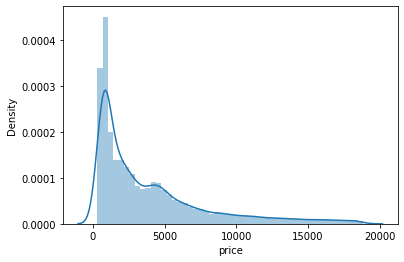

In [8]:
sns.distplot(df['price'])

We see that the target variable is right-skewed. We can take the log transform this variable so that it becomes normally distributed. A normally distributed target variable helps in better modelling the relationship of the target variable with the independent variables.

In [9]:
# Skewness 
print("The skewness of the Price in the dataset is {}".format(df['price'].skew()))

The skewness of the Price in the dataset is 1.618395283383529


Let us now log-transform this variable and see if the distribution can get any more closer to normal 

Skewness: 0.11529585821715065


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


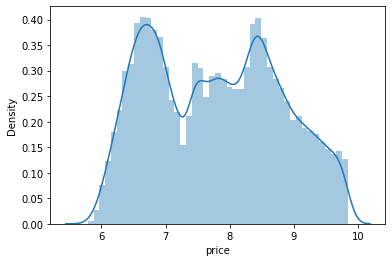

In [10]:
# Transforming the target variable
target = np.log(df['price'])
print("Skewness: {}".format(target.skew()))
sns.distplot(target)

Let us now examine each of the independent variables

#### Carat

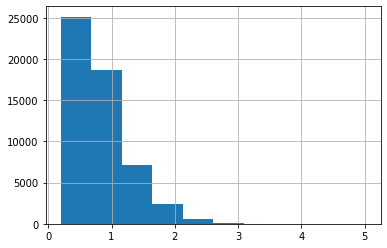

In [11]:
df['carat'].hist()

We see that most of the diamond carats range from 0.2-1.2


#### Cut

In [12]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

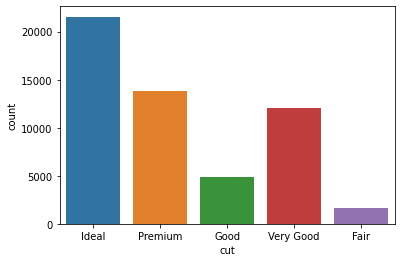

In [13]:
sns.countplot(x='cut', data=df)

We can infer that majority of the cuts are of "Ideal" or "Premium" type, whereas there are very few "Fair" cuts in the data.

#### Color

In [14]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

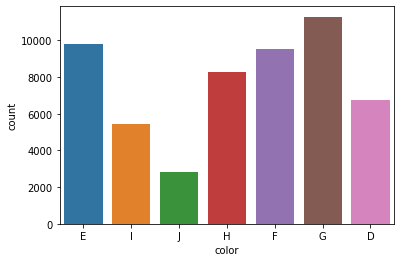

In [15]:
sns.countplot(x='color', data=df)

#### Clarity 

In [16]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


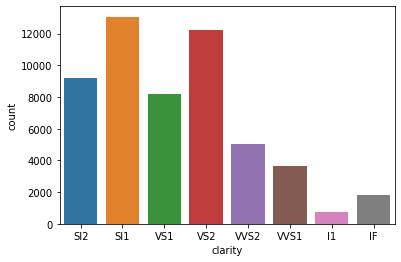

In [17]:
sns.countplot(df['clarity'])

Here, we can infer that most of the diamonds have claritites of 'SI1' or 'VS2'


#### Depth and Table

Text(0.5, 1.0, 'Distribution of table')

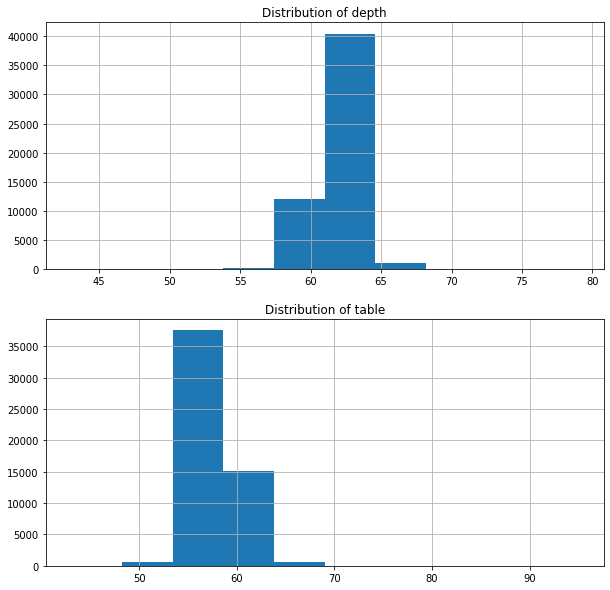

In [18]:
fig, ax = plt.subplots(2, figsize=(10,10))
df['depth'].hist(ax=ax[0])
df['table'].hist(ax=ax[1])
ax[0].set_title("Distribution of depth")
ax[1].set_title("Distribution of table")

#### x,y,z

Text(0.5, 1.0, 'Distribution of z')

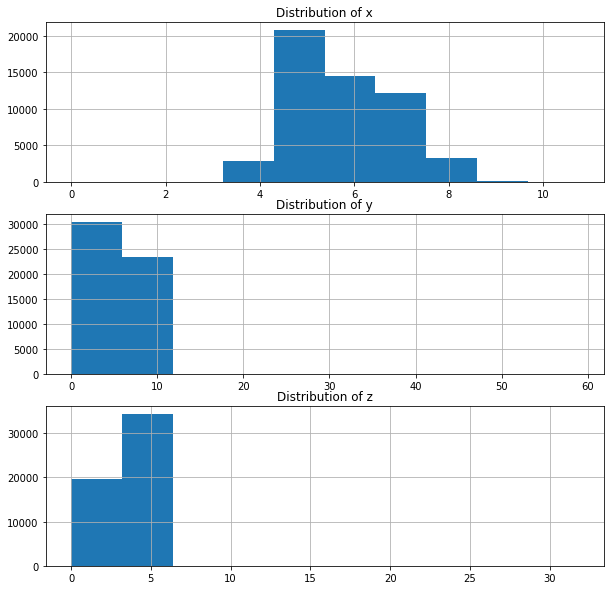

In [19]:
fig, ax = plt.subplots(3, figsize=(10,10))
df['x'].hist(ax=ax[0])
df['y'].hist(ax=ax[1])
df['z'].hist(ax=ax[2])
ax[0].set_title("Distribution of x")
ax[1].set_title("Distribution of y")
ax[2].set_title("Distribution of z")

#### Price

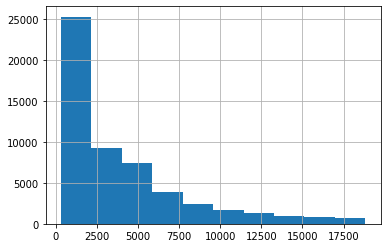

In [20]:
df['price'].hist()

### Feature Selection

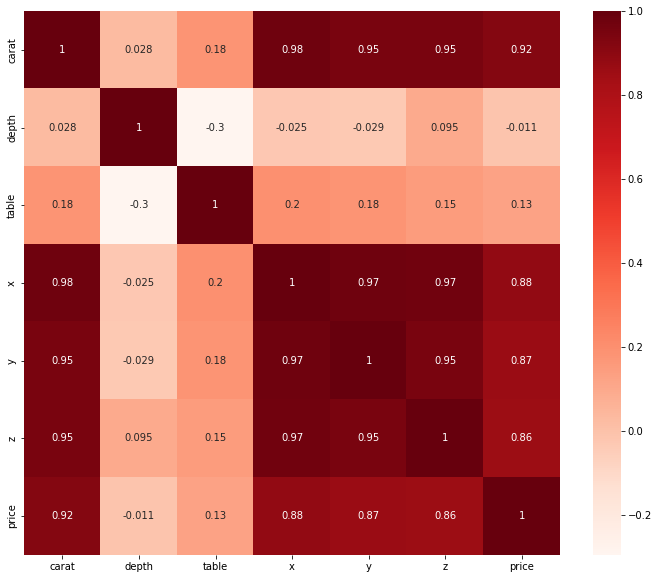

In [21]:
# Using Pearson Correlation 
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

In [22]:
# correlation with output variable 
cor_target = abs(cor["price"])

# Selecting highly correlated features 
relevent_features = cor_target[cor_target>0.5]
relevent_features

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
price    1.000000
Name: price, dtype: float64

In [23]:
df.drop(['depth', 'table'], axis=1, inplace=True)

In [24]:
df.head()

,carat,cut,color,clarity,x,y,z,price
0,0.23,Ideal,E,SI2,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,4.34,4.35,2.75,335


## REGRESSION

In [25]:
# Encoding the categorical data 
# Encoding the independent variables
dummy_cut = pd.get_dummies(df['cut'],drop_first=True)   # drop_first to avoid the dummy variable trap
df = pd.concat([df, dummy_cut], axis=1)
df = df.drop('cut',axis=1)
df.head()

,carat,color,clarity,x,y,z,price,Good,Ideal,Premium,Very Good
0,0.23,E,SI2,3.95,3.98,2.43,326,0,1,0,0
1,0.21,E,SI1,3.89,3.84,2.31,326,0,0,1,0
2,0.23,E,VS1,4.05,4.07,2.31,327,1,0,0,0
3,0.29,I,VS2,4.20,4.23,2.63,334,0,0,1,0
4,0.31,J,SI2,4.34,4.35,2.75,335,1,0,0,0


In [26]:
dummy_color = pd.get_dummies(df['color'], drop_first=True)   
df = pd.concat([df, dummy_color], axis=1)
df = df.drop('color',axis=1)
df.head()

,carat,clarity,x,y,z,price,Good,Ideal,Premium,Very Good,E,F,G,H,I,J
0,0.23,SI2,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0
1,0.21,SI1,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0
2,0.23,VS1,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0
3,0.29,VS2,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0
4,0.31,SI2,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1


In [27]:
dummy_clarity = pd.get_dummies(df['clarity'], drop_first=True)
df = pd.concat([df, dummy_clarity], axis=1)
df = df.drop('clarity', axis=1)
df.head()

,carat,x,y,z,price,Good,Ideal,Premium,Very Good,E,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,3.95,3.98,2.43,326,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,3.89,3.84,2.31,326,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,4.05,4.07,2.31,327,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4.20,4.23,2.63,334,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,4.34,4.35,2.75,335,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### Splitting the data into training and test sets 

In [28]:
order = df.columns.to_list()
order

['carat',
 'x',
 'y',
 'z',
 'price',
 'Good',
 'Ideal',
 'Premium',
 'Very Good',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'IF',
 'SI1',
 'SI2',
 'VS1',
 'VS2',
 'VVS1',
 'VVS2']

In [29]:
order = ['carat',
 'x',
 'y',
 'z',
 'Good',
 'Ideal',
 'Premium',
 'Very Good',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'IF',
 'SI1',
 'SI2',
 'VS1',
 'VS2',
 'VVS1',
 'VVS2',
  'price']

In [30]:
df = df[order]

In [31]:
df.head()

,carat,x,y,z,Good,Ideal,Premium,Very Good,E,F,...,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price
0,0.23,3.95,3.98,2.43,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,3.89,3.84,2.31,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,0.23,4.05,4.07,2.31,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,4.20,4.23,2.63,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,334
4,0.31,4.34,4.35,2.75,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,335


In [32]:
X = df.iloc[:,:-1].values
y = df.iloc[:,21].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### Multiple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
# making predictions
y_pred = regressor.predict(X_test)

In [36]:
y_pred

array([4903.30536831, 7632.23200502, 6110.12189671, ..., 5282.99282238,
       7007.69080162, 2449.11732103])

In [37]:
mlr_score = regressor.score(X_test, y_test)

### Support Vector Regression

In [38]:
from sklearn import preprocessing, svm

X_svm = X.copy()
X_svm = preprocessing.scale(X_svm)

X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y, test_size=0.2, random_state=0)


In [39]:
clf = svm.SVR(kernel='linear')
clf.fit(X_svm_train, y_svm_train)


SVR(kernel='linear')

In [40]:
svr_score = clf.score(X_svm_test,y_svm_test)

### Decision Tree Regression 

In [41]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [42]:
regressor_dt.predict(X_test)

array([4537., 7109., 5098., ..., 4853., 9691., 1882.])

In [43]:
dt_score = regressor_dt.score(X_test, y_test)

### Random Forest Regression


In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [45]:
rf_score = regressor_rf.score(X_test, y_test)

### Best Model

In [46]:
print('Multiple Linear Regression accuracy:', mlr_score)
print('SVR score: ', svr_score)
print('Decision Tree Regression score: ', dt_score)
print('Random Forest Regression score: ', rf_score)

Multiple Linear Regression accuracy: 0.9211007993351882
SVR score:  0.8728854886387849
Decision Tree Regression score:  0.9500345171418985
Random Forest Regression score:  0.9746595518544936


We can conclude that the Random Forest Regression model performed the best with an accuracy of 97.4%